# Jupyter notebook sample

In [1]:
import csv

import warnings
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

### Import data

# Read data from a csv file

In [2]:
# Defining data for the dataframe
# download from https://www.kaggle.com/datasets/supplejade/bccc-cira-cic-dohbrw-2020-dns-over-http/download?datasetVersionNumber=2
# and unzip it to data folder

df = pd.read_csv('data/BCCC-CIRA-CIC-DoHBrw-2020.csv', na_values=['NA'])

def add_space(s):
    a = s[0]
    for i in s[1:]:
        if i.isupper():
            a += ' '
        a += i
    return a

df.columns = [add_space(i.replace(' ', '')) for i in df.columns]

df.describe()

,Flow Bytes Sent,Flow Sent Rate,Flow Bytes Received,Flow Received Rate,Packet Length Variance,Packet Length Standard Deviation,Packet Length Mean,Packet Length Median,Packet Length Mode,Packet Length Skew From Median,...,Packet Time Skew From Mode,Packet Time Coefficientof Variation,Response Time Time Variance,Response Time Time Standard Deviation,Response Time Time Mean,Response Time Time Median,Response Time Time Mode,Response Time Time Skew From Median,Response Time Time Skew From Mode,Response Time Time Coefficientof Variation
count,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,...,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000
mean,4.020093e+04,4.733915e+04,4.250156e+04,3.166829e+04,9.263585e+04,220.169083,173.159814,95.472702,70.749953,0.442934,...,1.246052,0.972995,1.711825,0.319586,0.442021,0.394671,0.205894,-0.968984,-0.060800,1.114611
std,1.439617e+05,4.212751e+05,1.393927e+05,2.566805e+05,1.534938e+05,210.141825,85.506490,32.999740,14.830277,1.551998,...,0.713803,0.520212,11.106412,1.244031,2.071807,2.351233,1.724873,3.163775,3.198770,1.735820
min,5.500000e+01,1.464903e+00,5.400000e+01,1.576245e+00,0.000000e+00,0.000000,56.000000,54.000000,54.000000,-10.000000,...,-5.265523,0.077182,0.000000,0.000000,0.000005,0.000002,-0.000001,-10.000000,-10.000000,0.000000
25%,6.180000e+02,5.410781e+01,4.760000e+02,1.418128e+02,4.692099e+02,21.661253,92.000000,76.000000,66.000000,0.199848,...,0.627988,0.577836,0.000021,0.004454,0.010538,0.012238,0.000016,-1.797168,0.393686,0.552687
50%,1.807000e+03,3.640969e+02,4.827000e+03,4.611146e+02,1.826789e+04,135.142971,152.488283,87.000000,68.000000,0.986397,...,1.224949,0.748184,0.000079,0.008820,0.015148,0.015407,0.000034,0.000000,0.908002,0.800649
75%,5.542000e+03,3.810260e+03,7.888000e+03,4.215498e+03,1.415989e+05,376.296309,228.758621,105.000000,68.000000,1.201609,...,1.716577,1.516263,0.000357,0.018640,0.024903,0.016300,0.015161,0.936908,1.305393,1.208105
max,8.015359e+06,2.304348e+07,7.723184e+06,7.600000e+06,1.578115e+06,1256.230616,689.800000,317.000000,553.000000,2.932375,...,12.956406,5.616085,647.245330,25.441017,28.017596,28.017596,28.017596,2.970716,5.428781,66.309747


## Data visualization
#### Histogram of the PCA data


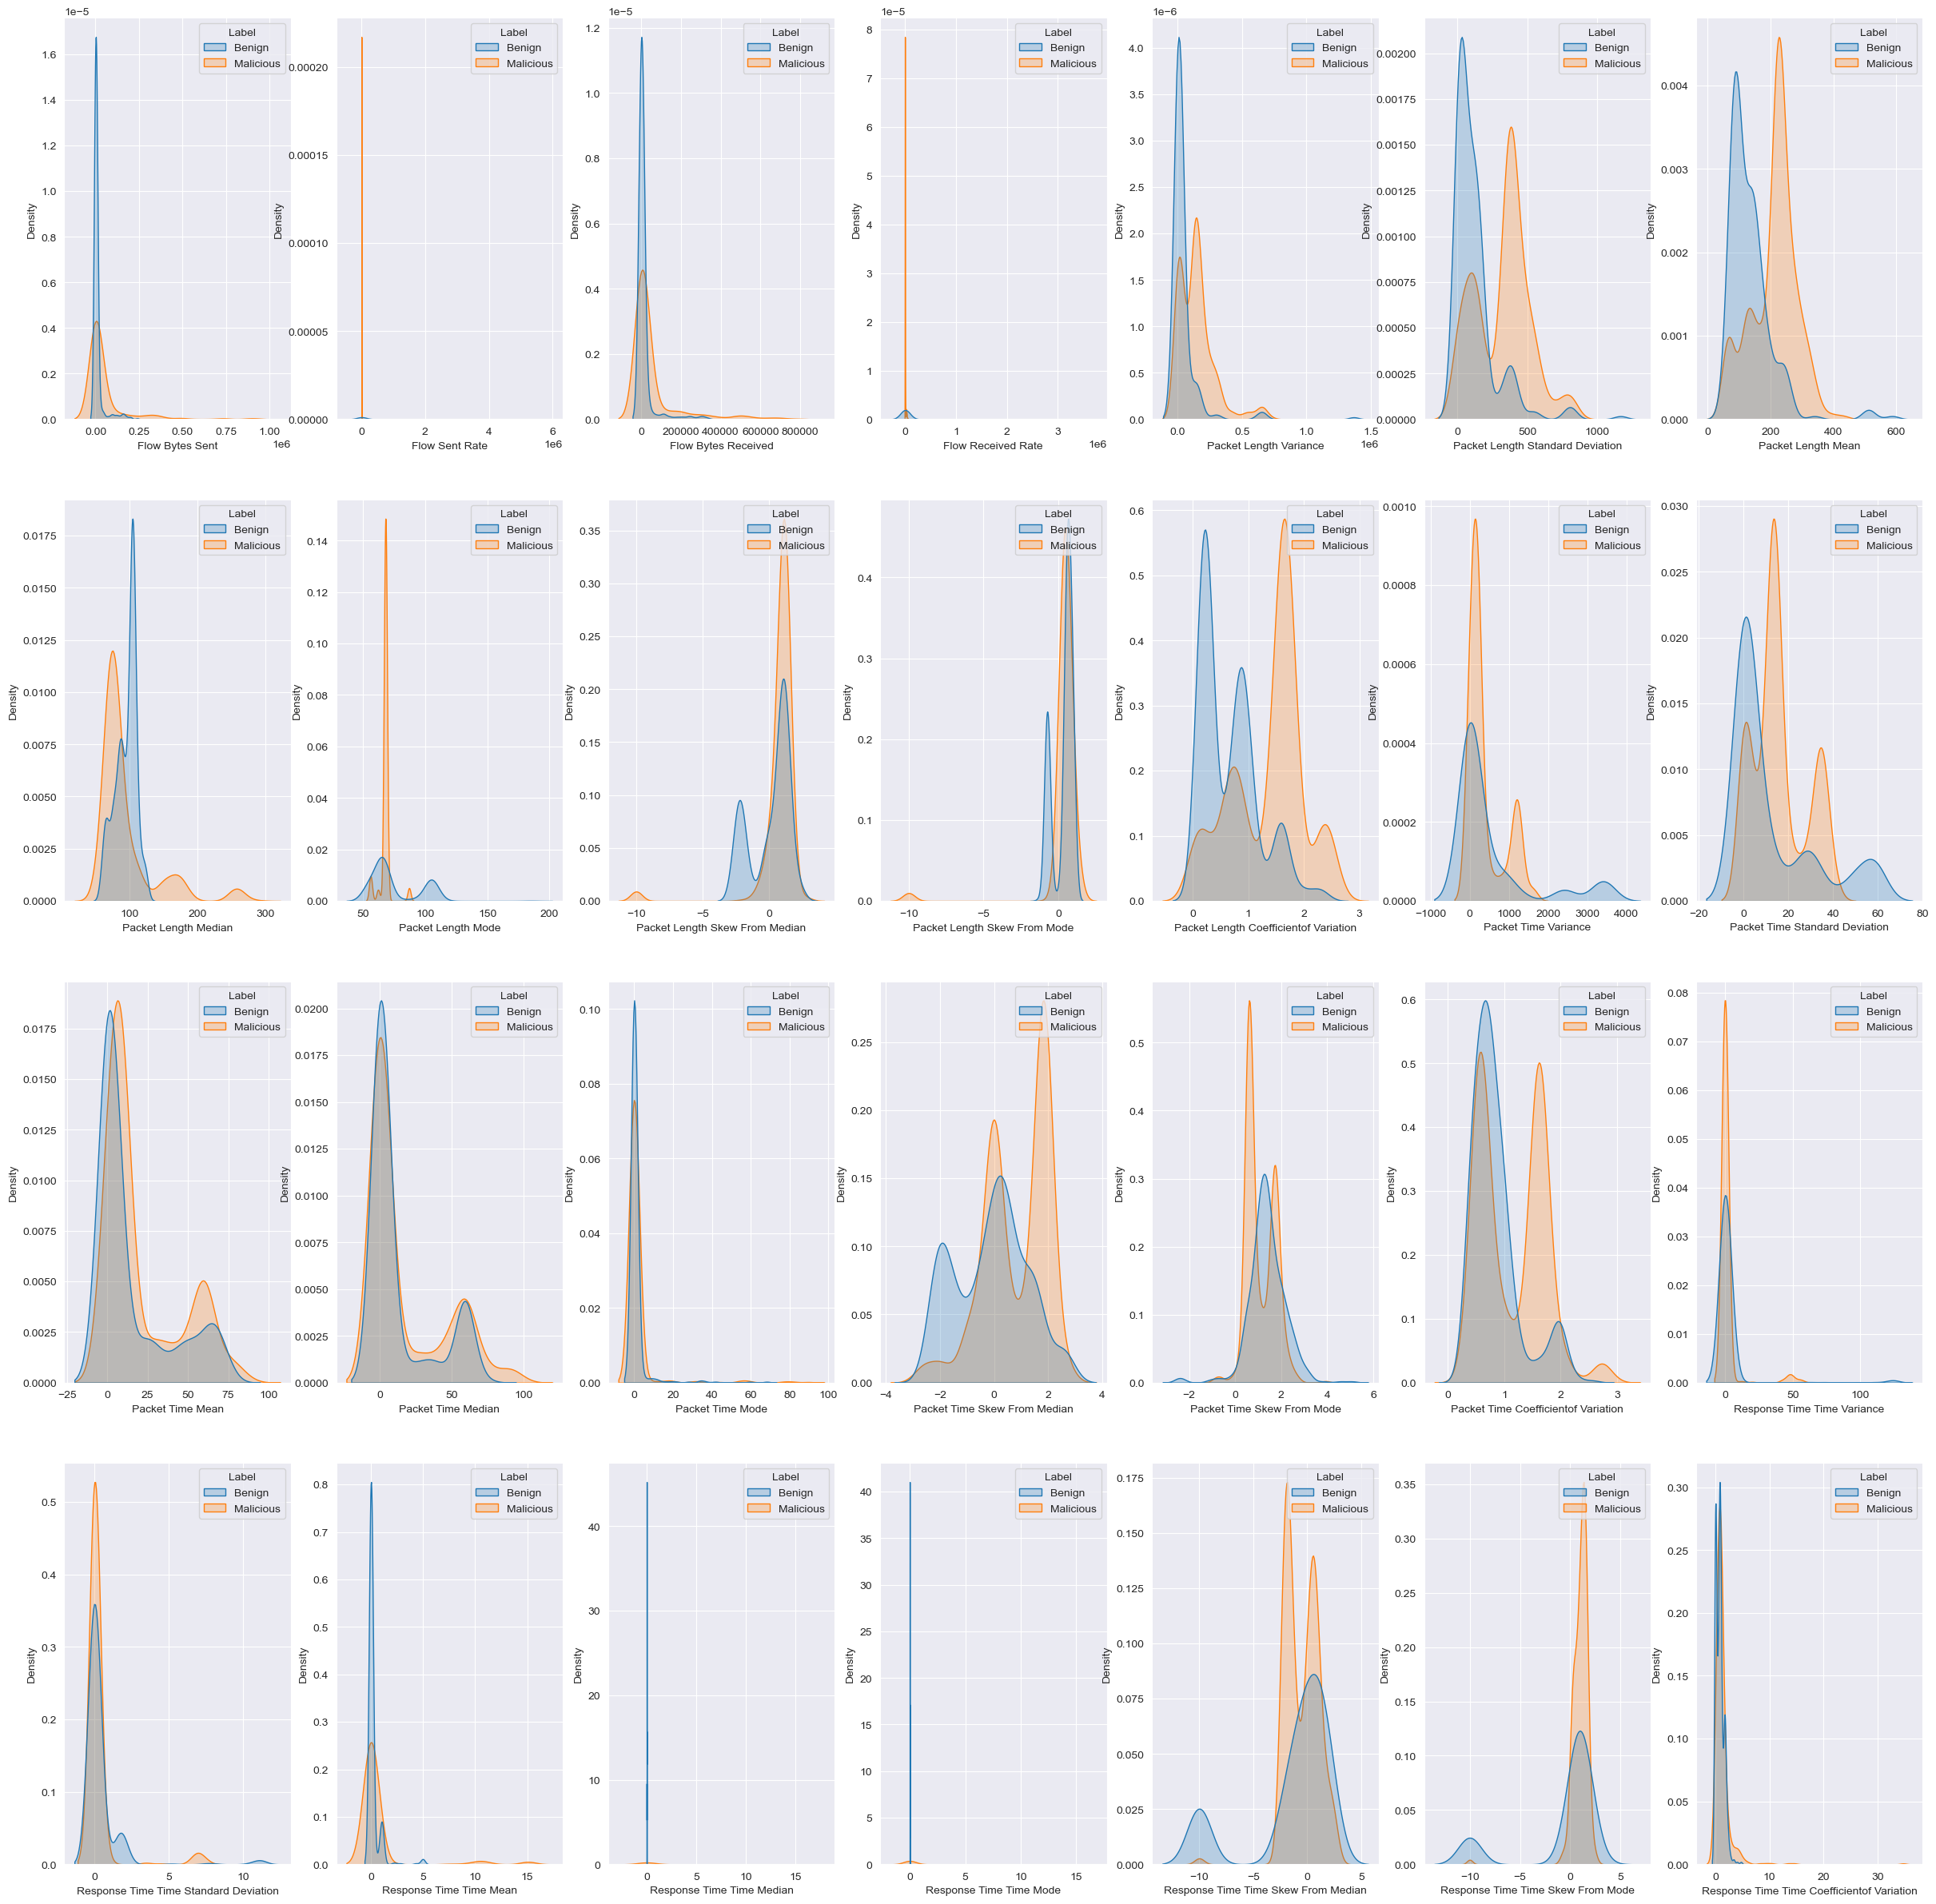

In [3]:
df_subset = df.iloc[:1000, :]
df_subset.replace([np.inf, -np.inf], np.nan)

# 28 columns
fig = plt.figure(figsize=(30, 30))

for i in df_subset.columns[:-1]:
    plt.subplot(4,7, list(df_subset.columns).index(i) + 1)
    sb.kdeplot(data=df_subset, x=i, hue='Label', fill=True)
    
plt.show()
    

### Create a PairPlot for each parameter
This will save the graphs to the plots path

In [ ]:
palette = sb.color_palette("tab10", n_colors=2)  
colormap = sb.color_palette("tab10", as_cmap=True)

colors = [colormap(i) for i in range(len(palette))]

for i in df_subset.columns[:-1]:
    fig = plt.figure(figsize=(16, 7*3+1))
    plt.title(i)
    
    for j in df_subset.columns[:-1]:
        
        plt.subplot(7,4, list(df_subset.columns).index(j) + 1)
        if i == j:
            sb.kdeplot(data=df_subset, x=i, hue='Label', fill=True, palette=colors)
        else:
            sb.scatterplot(data=df_subset, x=i, y=j, hue='Label', palette=colors)
    
    print(f'Done with {i}')
    plt.tight_layout()
    
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.figlegend(handles, labels, loc='lower center', ncol=len(colors), title='Label', bbox_to_anchor=(0.5, -0.02))
    plt.tight_layout()
    
    plt.savefig(f'plots/{i}.png')
    plt.close()

### Histogram of the PCA data

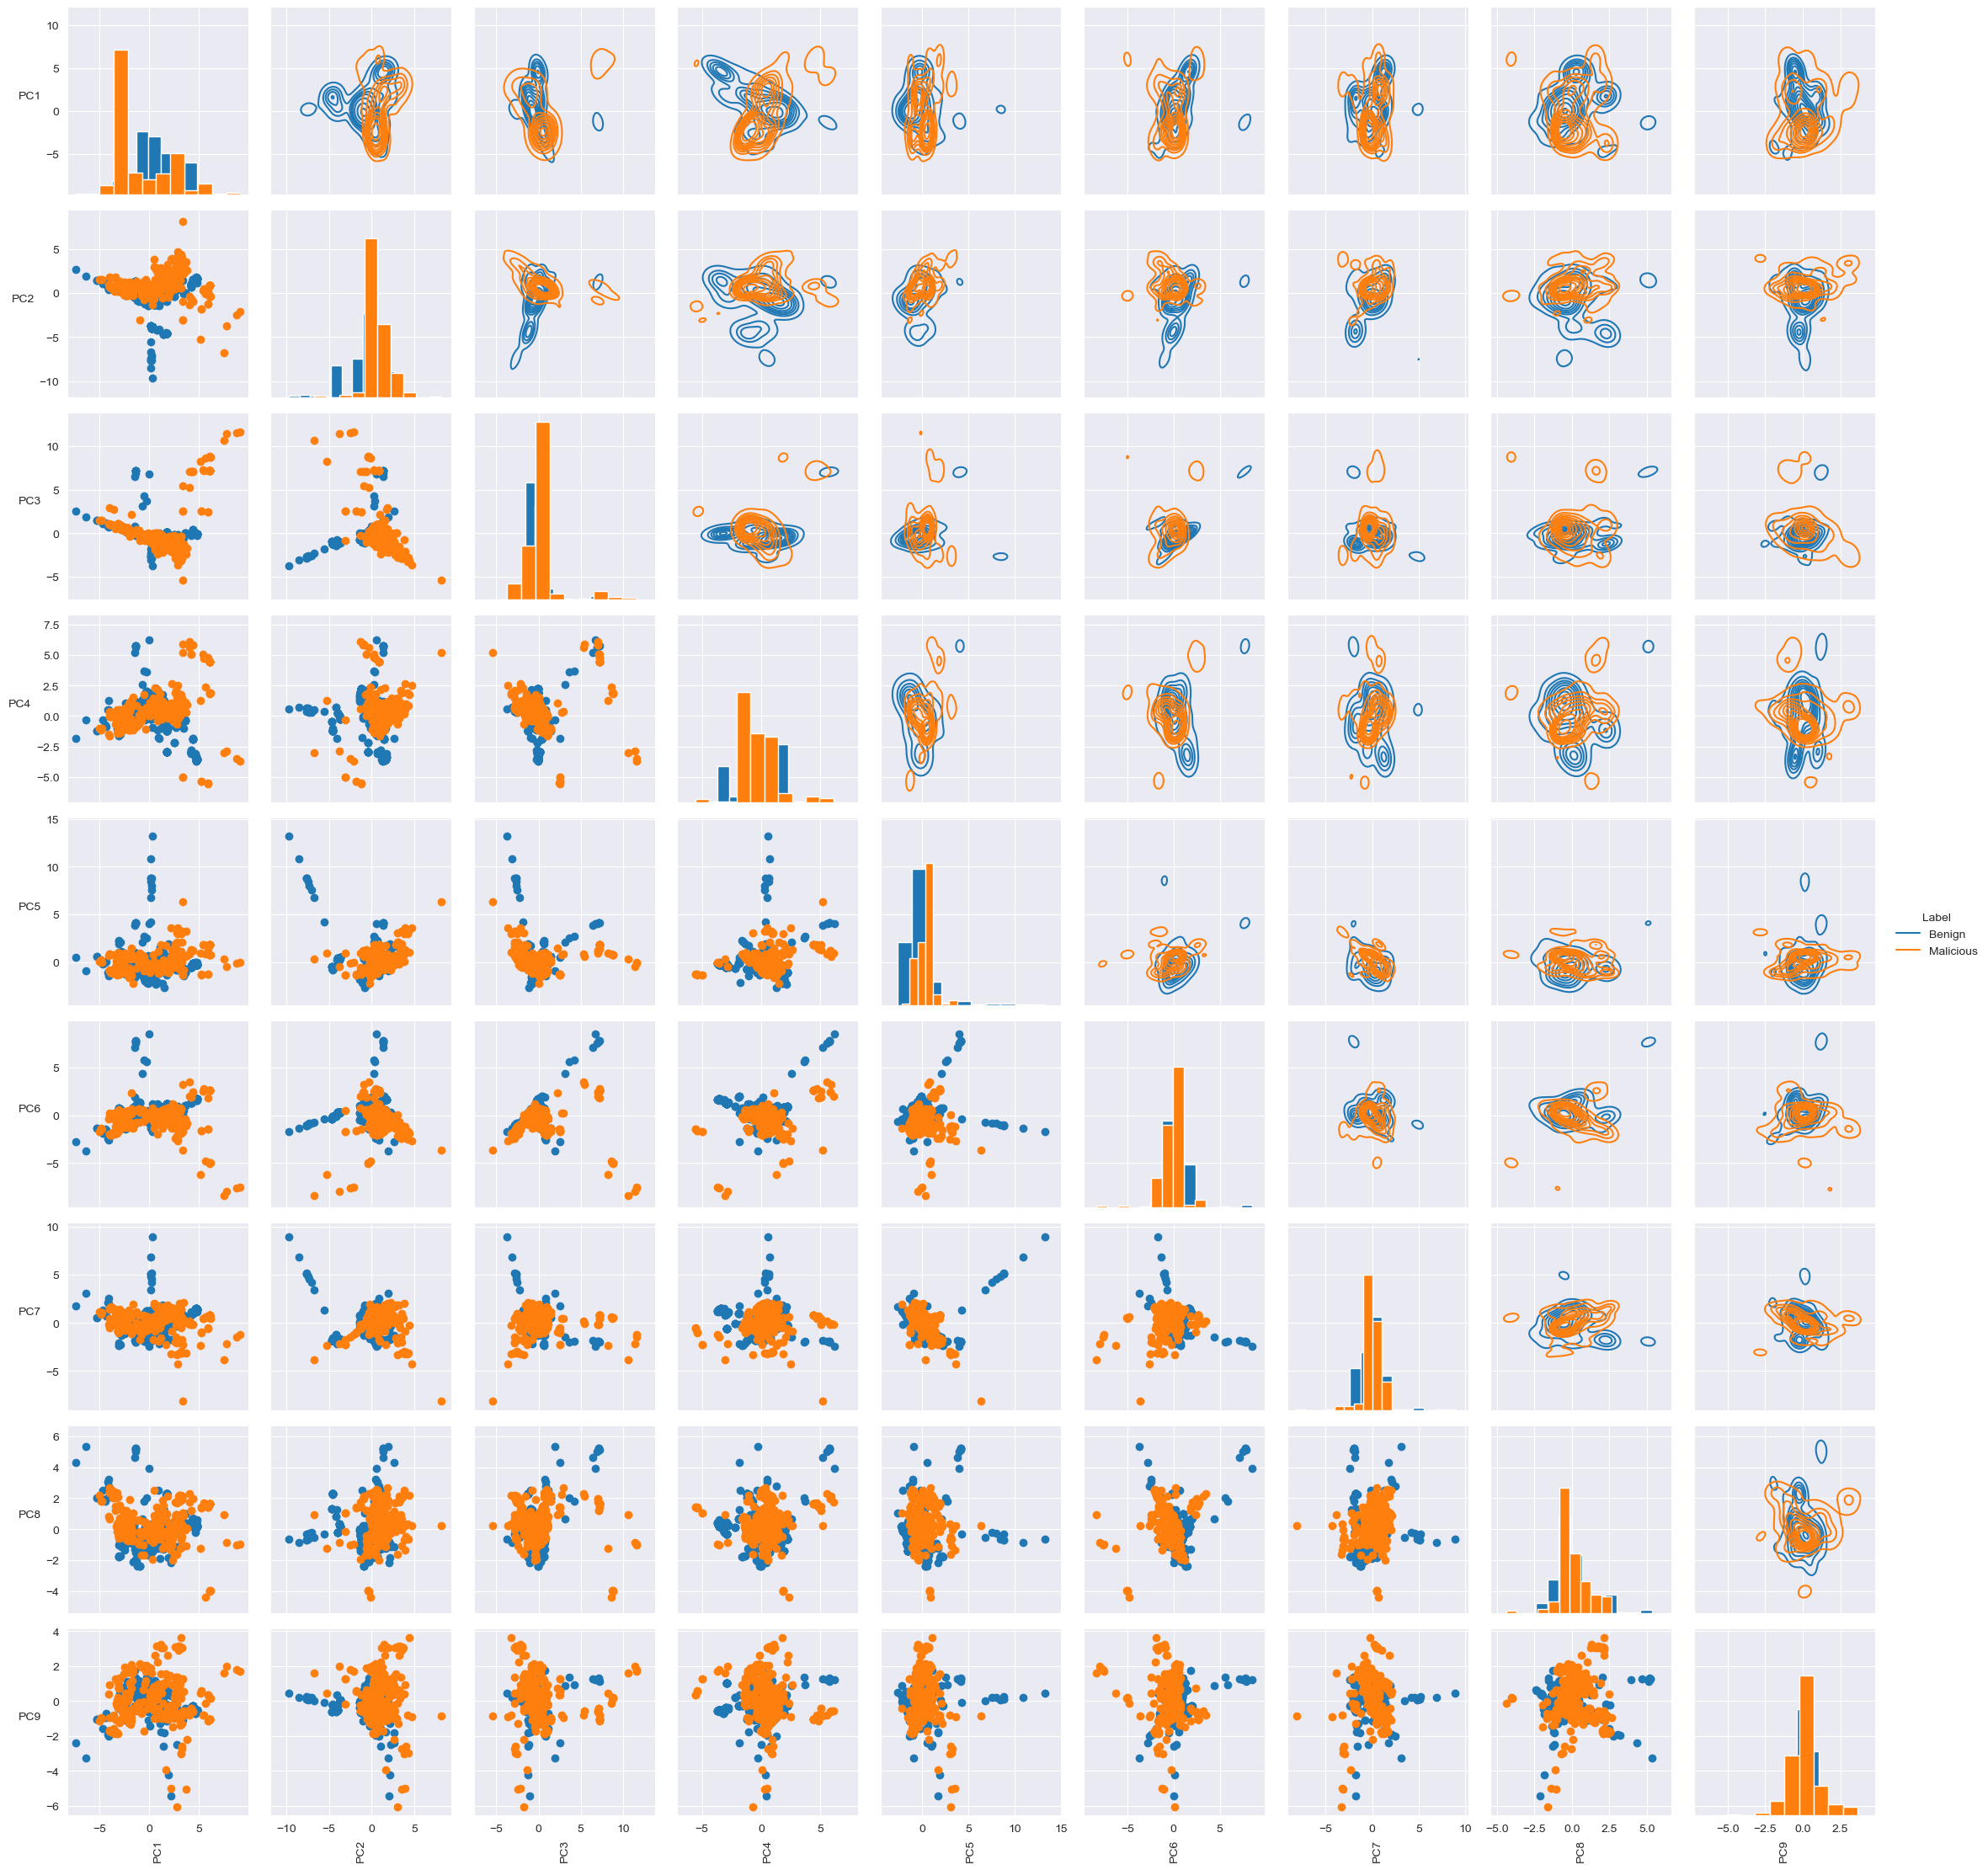

In [6]:
data_pca = pd.read_csv("data/data_pca.csv")

g = sb.PairGrid(data_pca.iloc[:1000][:], hue="Label")
g.map_diag(plt.hist)
g.map_lower(plt.scatter)
g.map_upper(sb.kdeplot)

g.add_legend()

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    ax.yaxis.get_label().set_horizontalalignment('right')

plt.show()

### Correlation Matrix

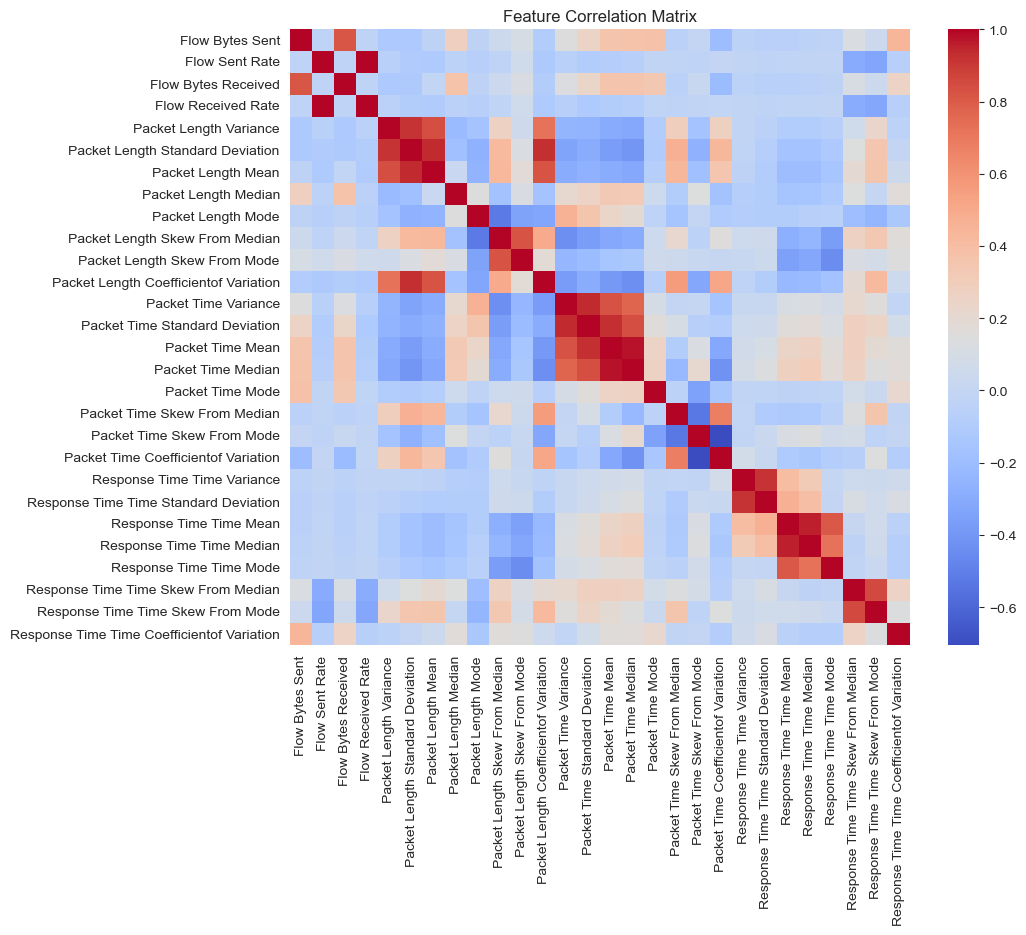

In [12]:
X = df.iloc[:, :28]
y = df.iloc[:, 28]


correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()